In [90]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw
import os
import random
np.random.seed(0)
random.seed(0)

In [91]:
path2data = "D:\FEL\Ya"
imageL = Image.open(os.path.join(path2data,"imL.png"))
imageN = Image.open(os.path.join(path2data,"imN.png"))
imageN2 = Image.open(os.path.join(path2data,"imN2.png"))

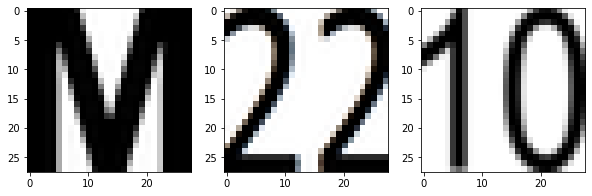

In [92]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(imageL, cmap=plt.cm.gray)
plt.subplot(1,3,2)
plt.imshow(imageN, cmap=plt.cm.gray)
plt.subplot(1,3,3)
plt.imshow(imageN2, cmap=plt.cm.gray)

In [93]:
imageL = np.array(imageL, dtype='f').flatten()
imageN = np.array(imageN, dtype='f').flatten()
imageN2 = np.array(np.array(imageN2)[:,:,0], dtype='f').flatten()
for i in range(0,len(imageL)):
    if(imageL[i]<125):
        imageL[i] = -1
    else:
        imageL[i] = 1

for i in range(0,len(imageN)):
    if(imageN[i]<125):
        imageN[i] = -1
    else:
        imageN[i] = 1
        
for i in range(0,len(imageN2)):
    if(imageN2[i]<125):
        imageN2[i] = -1
    else:
        imageN2[i] = 1      
print(imageL)
print(imageN)
print(imageN2)

[-1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.
  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.
  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1. -1. -1. -1.
 -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.
 -1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1.  1

In [37]:
import copy
num_noise_L = 250
data = []

for i in range(0,num_noise_L):
    noise_example_L = copy.deepcopy(imageL)
    num_pixels_to_change_L = np.uint8(np.random.rand(1)*np.ceil(len(imageL)/3))
    pixels_to_change_L = np.uint(np.random.rand(num_pixels_to_change_L[0])*len(imageL))
    
    for j in pixels_to_change_L:
        noise_example_L[j] = -noise_example_L[j]
    data.append(noise_example_L)

In [38]:
num_noise_N = 250
for i in range(0,num_noise_N):
    noise_example_N = copy.deepcopy(imageN)
    num_pixels_to_change_N = np.uint8(np.random.rand(1)*np.ceil(len(imageN)/3))
    pixels_to_change_N = np.uint(np.random.rand(num_pixels_to_change_N[0])*len(imageN))
    
    for j in pixels_to_change_N:
        noise_example_N[j] = -noise_example_N[j]
    data.append(noise_example_N)

In [39]:
num_noise_N2 = 250
for i in range(0,num_noise_N2):
    noise_example_N2 = copy.deepcopy(imageN2)
    num_pixels_to_change_N2 = np.uint8(np.random.rand(1)*np.ceil(len(imageN2)/3))
    pixels_to_change_N2 = np.uint(np.random.rand(num_pixels_to_change_N2[0])*len(imageN2))
    
    for j in pixels_to_change_N2:
        noise_example_N2[j] = -noise_example_N2[j]
    data.append(noise_example_N2)

In [40]:
import copy
ordered_data = copy.deepcopy(data)
random.shuffle(data)

In [41]:
print(len(imageN2))

784


In [42]:
print(np.array(data).shape)

(750, 784)


In [43]:
real_cetnroid_L = np.zeros(np.array(data).shape[1])
real_cetnroid_N = np.zeros(np.array(data).shape[1])
real_cetnroid_N2 = np.zeros(np.array(data).shape[1])
for i in range(0,np.array(data).shape[1]):
    real_cetnroid_L[i] = np.mean(np.array(ordered_data)[:250,i])
    real_cetnroid_N[i] = np.mean(np.array(ordered_data)[250:500,i])
    real_cetnroid_N2[i] = np.mean(np.array(ordered_data)[500:750,i])

In [46]:
print(real_cetnroid_L)

[-0.75199997 -0.736      -0.69599998 -0.72799999 -0.75199997 -0.71200001
 -0.68000001 -0.77600002 -0.69599998  0.77600002  0.736       0.75199997
  0.81599998  0.72000003  0.75999999  0.792       0.72000003  0.704
  0.80000001 -0.72799999 -0.736      -0.77600002 -0.80800003 -0.78399998
 -0.824      -0.74400002 -0.75199997 -0.736      -0.736      -0.76800001
 -0.81599998 -0.80000001 -0.736      -0.72799999 -0.72799999 -0.72000003
 -0.68000001  0.72000003  0.77600002  0.71200001  0.72000003  0.62400001
  0.71200001  0.68000001  0.76800001  0.80800003  0.71200001 -0.824
 -0.74400002 -0.67199999 -0.77600002 -0.792      -0.78399998 -0.68000001
 -0.74400002 -0.74400002 -0.77600002 -0.77600002 -0.69599998 -0.736
 -0.72799999 -0.77600002 -0.72799999 -0.792      -0.75999999  0.80800003
  0.704       0.736       0.68000001  0.71200001  0.72000003  0.76800001
  0.69599998  0.68800002  0.704      -0.62400001 -0.76800001 -0.75199997
 -0.77600002 -0.736      -0.67199999 -0.74400002 -0.704      -0.66

In [60]:
class Kohonen_Net():
    def __init__(self, data, num_classes, params):
        self.data = np.array(data)
        self.num_samples = np.array(data).shape[0]
        self.num_features = np.array(data).shape[1]
        self.num_classes = num_classes
        self.params = params
        centroids = np.zeros((self.num_classes,self.num_features))
        for i in range(0,centroids.shape[0]):
            for j in range(0,centroids.shape[1]):
                val = np.random.rand(1)* (1 - (-1)) + (-1)

        self.centroids = centroids
                
    def forward(self):
        print("random centroid`s coordinates:\n",self.centroids)
        for epoch in range(0,self.params["num_epochs"]):
            learning_rate = self.params["learning_rate0"]*np.exp(-epoch/self.params["Tl"])
            neighborhood_size = self.params["sigma0"]*np.exp(-epoch/self.params["Ts"])
                
            for vector in self.data:
                d1 = np.sqrt(np.sum((vector - self.centroids[0,:])**2))
                d2 = np.sqrt(np.sum((vector - self.centroids[1,:])**2))
                d3 = np.sqrt(np.sum((vector - self.centroids[2,:])**2))

                distances = np.array([d1,d2,d3])
                min_dist = np.min(distances)
                ind_BMU = np.where(distances == min_dist)[0]
                
                # Weight update
                
                for j in range(0,self.centroids.shape[0]):
                    lateral_distance_between_neurons = np.sqrt(np.sum((self.centroids[j,:] - self.centroids[ind_BMU,:])**2))
                    Topological_Neighborhood = np.exp(-(lateral_distance_between_neurons**2)/(2*neighborhood_size**2))
                
                    for i in range(0,self.data.shape[1]):
                        delta_w = learning_rate*Topological_Neighborhood*(vector[i] - self.centroids[j,i])
                        
                        self.centroids[j,i] = self.centroids[j,i] + delta_w
        return self.centroids

In [61]:
parameters = {
    "num_epochs": 10,
    "sigma0": 2,
    "learning_rate0": 0.5,
    "Ts": 1,
    "Tl": 0.5,
}

In [62]:
model = Kohonen_Net(data, 3, parameters)

In [63]:
result_centroids = model.forward()

random centroid`s cordinates:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [66]:
print(result_centroids[0])

[-0.78464629 -0.73803753 -0.70902821 -0.66512461 -0.67362101 -0.78105857
 -0.66536278 -0.80642229 -0.72310347  0.75806485  0.70002862  0.79801138
  0.82736379  0.7120447   0.74640037  0.7975539   0.70656203  0.71469614
  0.75683291 -0.75495157 -0.72273677 -0.74686088 -0.79788082 -0.81216221
 -0.83125955 -0.79831931 -0.72961929 -0.72464404 -0.72046877 -0.7333691
 -0.82025957 -0.8001633  -0.71305263 -0.72138778 -0.72082463 -0.71376789
 -0.71354133  0.73158173  0.7729759   0.71962968  0.70041054  0.65144917
  0.67220097  0.64588611  0.77131612  0.81436856  0.71819049 -0.84624105
 -0.70558527 -0.63255531 -0.78455101 -0.73645612 -0.81193439 -0.68735233
 -0.75227394 -0.76815103 -0.77018838 -0.79173888 -0.61751727 -0.73496204
 -0.74192514 -0.78635765 -0.7327907  -0.81532417 -0.7822777   0.83836258
  0.72961959  0.74478227  0.72415611  0.73675734  0.71843998  0.78730351
  0.73977635  0.70511928  0.69418124 -0.62289744 -0.80187849 -0.73188223
 -0.74377183 -0.72594163 -0.66061714 -0.74705424 -0.

In [103]:
print(np.sqrt(np.sum((real_cetnroid_L-result_centroids[0])**2)))
print(np.sqrt(np.sum((real_cetnroid_N-result_centroids[1])**2)))
print(np.sqrt(np.sum((real_cetnroid_N2-result_centroids[2])**2)))

0.7124819704955893
0.6819631830979528
0.6683526960570452


In [96]:
num = 10
image_indexes = np.uint(np.random.rand(num)*np.array(data).shape[0])
print(image_indexes)
images = []
predicted_classes = []

for i in image_indexes:
    image = data[i]
    dist1 = np.sqrt(np.sum((image-result_centroids[0])**2))
    dist2 = np.sqrt(np.sum((image-result_centroids[1])**2))
    dist3 = np.sqrt(np.sum((image-result_centroids[2])**2))
    distances = np.array([dist1,dist2,dist3])
    min_dist = np.min(distances)
    image_class = np.where(distances == min_dist)[0]
    images.append(image.reshape(28,28))
    predicted_classes.append(image_class[0])

[593 396 426 694  53  65  15 624 583 652]


[0, 1, 1, 0, 0, 0, 1, 0, 2, 0]


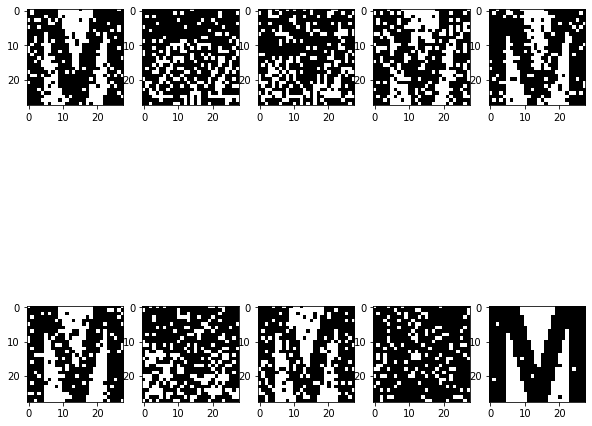

In [97]:
print(predicted_classes)
plt.figure(figsize=(10,10))
for i in range(1,num+1):
    plt.subplot(2,np.uint(num/2),i)
    plt.imshow(images[i-1], cmap=plt.cm.gray)

In [102]:
for i in image_indexes:
    print(f'Distances for {i} image')
    print(f'image {i} and centroid Letter',np.sqrt(np.sum((data[i]-result_centroids[0])**2)))
    print(f'image {i} and centroid 22_Number',np.sqrt(np.sum((data[i]-result_centroids[1])**2)))
    print(f'image {i} and centroid 10_Number',np.sqrt(np.sum((data[i]-result_centroids[2])**2)))

Distances for 593 image
image 593 and centroid Letter 18.906099818521856
image 593 and centroid 22_Number 30.732694460630107
image 593 and centroid 10_Number 29.89364966318422
Distances for 396 image
image 396 and centroid Letter 31.314565365519712
image 396 and centroid 22_Number 21.22517183991121
image 396 and centroid 10_Number 26.003558317767332
Distances for 426 image
image 426 and centroid Letter 31.532635034099478
image 426 and centroid 22_Number 23.467695993562927
image 426 and centroid 10_Number 27.610954655029882
Distances for 694 image
image 694 and centroid Letter 23.445297194445406
image 694 and centroid 22_Number 31.571902120882232
image 694 and centroid 10_Number 30.932160388498733
Distances for 53 image
image 53 and centroid Letter 18.860413207102166
image 53 and centroid 22_Number 30.138762445413466
image 53 and centroid 10_Number 30.030272348406022
Distances for 65 image
image 65 and centroid Letter 18.300735110098156
image 65 and centroid 22_Number 30.52367657028801
